# Alphalens Quickstart Template

In [1]:
from zipline.pipeline.fundamentals import Fundamentals

from zipline.pipeline import Pipeline
from zipline.research import run_pipeline
from zipline.pipeline.factors import CustomFactor, SimpleMovingAverage
# 自builtin导入
from zipline.pipeline.builtin import QTradableStocksCN, Sector
from zipline.pipeline.data import EquityPricing
from alphalens.tears import create_information_tear_sheet
from alphalens.utils import get_clean_factor_and_forward_returns

## Define Your Alpha Factor Here

Spend your time in this cell, creating good factors. Then simply run the rest of the notebook to analyze `factor_to_analyze`!

In [2]:
from zipline.research import get_pricing

In [3]:
def make_pipeline():

    assets_moving_average = SimpleMovingAverage(inputs=[Fundamentals.balance_sheet.资产总计], window_length=252)
    current_assets = Fundamentals.balance_sheet.资产总计.latest

    factor_to_analyze = (current_assets - assets_moving_average)

    sector = Sector()

    return Pipeline(
        columns={'factor_to_analyze': factor_to_analyze, 'sector': sector},
        screen=QTradableStocksCN() & factor_to_analyze.notnull() & sector.notnull()
    )

factor_data = run_pipeline(make_pipeline(), '2015-1-1', '2016-1-1')
pricing_data = get_pricing(factor_data.index.levels[1], '2015-1-1', '2016-6-1', fields='open')

## Determine The Decay Rate Of Your Alpha Factor.

In [4]:
from alphalens.performance import mean_information_coefficient
from alphalens.tears import create_returns_tear_sheet

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


<AxesSubplot:title={'center':'IC Decay'}>

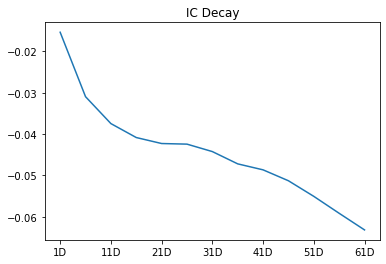

In [5]:
longest_look_forward_period = 63 # week = 5, month = 21, quarter = 63, year = 252
range_step = 5

merged_data = get_clean_factor_and_forward_returns(
    factor=factor_data['factor_to_analyze'],
    prices=pricing_data,
    periods=range(1, longest_look_forward_period, range_step)
)

mean_information_coefficient(merged_data).plot(title="IC Decay")

## Create Group Neutral Tear Sheets

In [6]:
sector_labels, sector_labels[-1] = dict(Sector.SECTOR_NAMES), "Unknown"

merged_data = get_clean_factor_and_forward_returns(
    factor=factor_data['factor_to_analyze'],
    prices=pricing_data,
    groupby=factor_data['sector'],
    groupby_labels=sector_labels,
    binning_by_group=True,
    periods=(1,5,10)
)

create_information_tear_sheet(merged_data, by_group=True, group_neutral=True)
create_returns_tear_sheet(merged_data, by_group=True, group_neutral=True)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
